In [95]:
import os, sys, csv
import warnings
import numpy as np
import nibabel as nb
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [40]:
def get_vectors(gradient_file,
                concordance_file,
                graymatter_file,
                lesion_file):

    # get numpy one dimensional arrays
    comp    = np.array(nb.load(gradient_file).get_data())
    conc    = np.array(nb.load(concordance_file).get_data())
    
    # get voxel coordinates on gray matter
    gm_mask = nb.load(graymatter_file).get_data()   
    x    = np.where(gm_mask==1)[0]
    y    = np.where(gm_mask==1)[1]
    z    = np.where(gm_mask==1)[2]
    
    # get voxel coordinates on the lesion side
    lesion = np.array(nb.load(lesion_file).get_data())
    x_le   = np.where(lesion==1)[0]
    y_le   = np.where(lesion==1)[1]
    z_le   = np.where(lesion==1)[2]
    
    # mask out comp and conc arrays with gray matter
    component   = comp[x,y,z]
    concordance = conc[x,y,z]
    
    # find where the lesion is on the gradient
    lesion_on_gradient = comp[x_le, y_le, z_le]
    
    # voxelwise distances to the lesion side on the gradient
    distance = np.zeros(len(component))
    for i in range(0, len(component)):        
        distance[i] = min(abs(component[i] - lesion_on_gradient))
        
    return concordance, distance

# example subject

In [44]:
data_dir      = '/data/pt_mar006/subjects_masks/'
gradient_file = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'

# get subject specific concordance and distance vectors
subject_id       = 'sd33'

concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

c, d = get_vectors(gradient_file,
                   concordance_file,
                   graymatter_file,
                   lesion_file)

print subject_id, c.shape, d.shape

sd33 (33114,) (33114,)


# all subjects

In [45]:
list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()
print(len(subject_list))

28


## distances on Gradient 1

In [54]:
data_dir      = '/data/pt_mar006/subjects_masks/'
data_out      = '/data/pt_mar006/subject_arrays/'
gradient_file = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    c_name = os.path.join(data_out, subject_id, 'conc.txt')
    d_name = os.path.join(data_out, subject_id, 'dist_g1.txt')
    
    np.savetxt(c_name, c, fmt='%1.5f')
    np.savetxt(d_name, d, fmt='%1.5f')

## distances on Gradient 2

In [57]:
data_dir      = '/data/pt_mar006/subjects_masks/'
data_out      = '/data/pt_mar006/subject_arrays/'
gradient_file = '/data/pt_mar006/components/mni3_component_2.nii.gz'

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)
    
    d_name = os.path.join(data_out, subject_id, 'dist_g2.txt')
    
    np.savetxt(d_name, d, fmt='%1.5f')


## distances on Gradient 3 

In [58]:
data_dir      = '/data/pt_mar006/subjects_masks/'
data_out      = '/data/pt_mar006/subject_arrays/'
gradient_file = '/data/pt_mar006/components/mni3_component_3.nii.gz'

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)
    
    d_name = os.path.join(data_out, subject_id, 'dist_g3.txt')
    
    np.savetxt(d_name, d, fmt='%1.5f')

# get data frame for the correlation values

In [70]:
gradient_file_list =  ['/data/pt_mar006/components/mni3_component_1.nii.gz',
                       '/data/pt_mar006/components/mni3_component_2.nii.gz',
                       '/data/pt_mar006/components/mni3_component_3.nii.gz']

rColumns = ['r1',
            'r2',  
            'r3'] 
                
rVals = pd.DataFrame(index=subject_list, 
                     columns=rColumns)

for gradient_file in gradient_file_list:
    
    if gradient_file == '/data/pt_mar006/components/mni3_component_1.nii.gz':
        Column = 'r1'
    elif gradient_file == '/data/pt_mar006/components/mni3_component_2.nii.gz':
        Column = 'r2'
    elif gradient_file == '/data/pt_mar006/components/mni3_component_3.nii.gz':
        Column = 'r3'
        
    for subject_id in subject_list:
    
        concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
        graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
        lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

        c, d = get_vectors(gradient_file,
                           concordance_file,
                           graymatter_file,
                           lesion_file)
        
        rVals.ix[subject_id][Column] = "{:.6f}".format(stats.spearmanr(c,d)[0])
    
    print gradient_file, Column

/data/pt_mar006/components/mni3_component_1.nii.gz r1
/data/pt_mar006/components/mni3_component_2.nii.gz r2
/data/pt_mar006/components/mni3_component_3.nii.gz r3


In [72]:
#rVals

## get behavioral measures

In [80]:
file_beh  = '/data/pt_mar006/documents/all_sd_datasummary_STEIGLITZ.xlsx'
db        = pd.read_excel(file_beh, index_col='study_id')

## concatenate correlations and behavioral measures

In [87]:
table = pd.concat([rVals,
                   db.ix[subject_list].NIHSS_admission,
                   db.ix[subject_list].NIHSS_discharge,
                   db.ix[subject_list].mRS_admission,
                   db.ix[subject_list].mRS_discharge,
                   ],
                   axis =1)
len(table)

28

In [88]:
table

,r1,r2,r3,NIHSS_admission,NIHSS_discharge,mRS_admission,mRS_discharge
study_id,,,,,,,
sd02,0.163259,-0.278337,0.272443,6,1,2,1
sd05,0.143888,-0.058529,0.298901,5,3,2,2
sd08,-0.063232,0.152462,-0.132560,1,0,1,0
sd10,-0.010591,0.044907,0.087325,0,0,0,0
sd13,0.035142,-0.031133,0.166316,7,0,4,0
sd14,0.106863,-0.130274,0.147300,0,0,0,0
sd16,-0.194615,0.133681,0.107650,1,0,0,0
sd17,0.091642,0.388081,0.066310,3,2,2,2
sd21,0.072500,0.088117,0.184781,1,0,3,2


## run correlation analysis

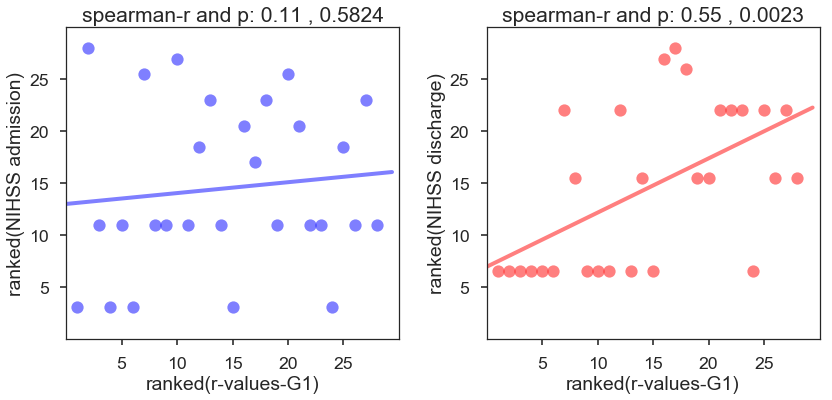

In [185]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r1),
            stats.rankdata(table.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G1)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r1,
            table.NIHSS_admission)) )

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r1),
            stats.rankdata(table.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G1)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r1,
            table.NIHSS_discharge)))

fig.tight_layout()

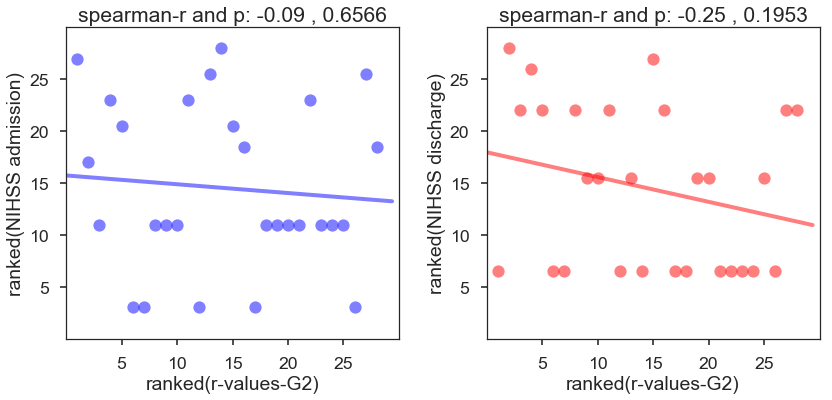

In [188]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r2),
            stats.rankdata(table.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G2)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r2,
            table.NIHSS_admission)) )

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r2),
            stats.rankdata(table.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G2)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r2,
            table.NIHSS_discharge)))

fig.tight_layout() 

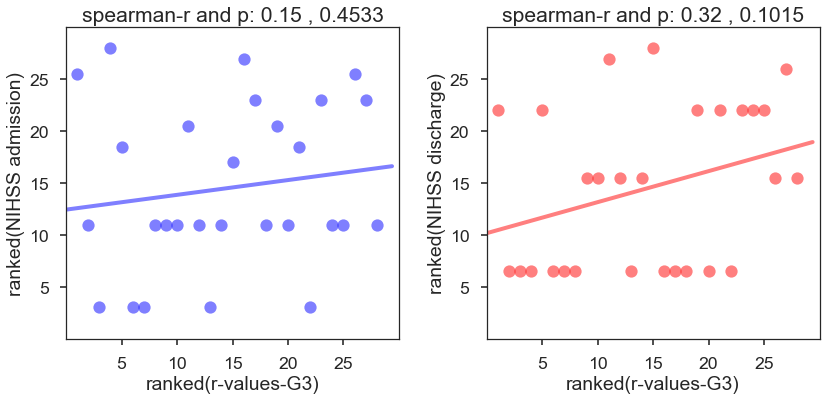

In [189]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r3),
            stats.rankdata(table.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G3)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r3,
            table.NIHSS_admission)) )

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r3),
            stats.rankdata(table.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G3)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r3,
            table.NIHSS_discharge)))

fig.tight_layout() 

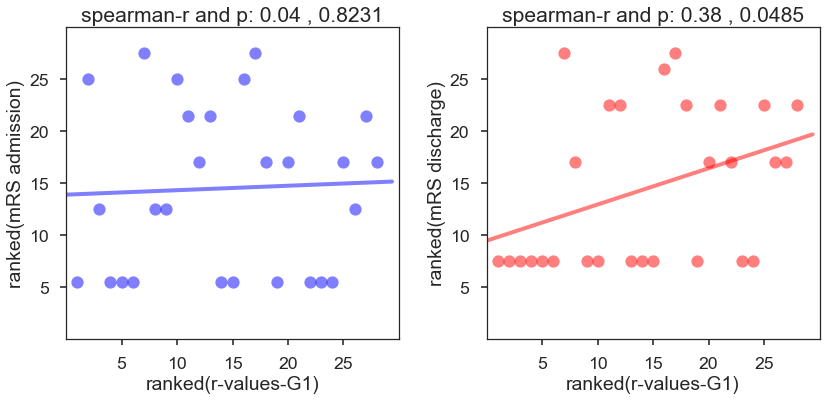

In [190]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r1),
            stats.rankdata(table.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G1)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r1,
            table.mRS_admission)) )

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r1),
            stats.rankdata(table.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G1)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r1,
            table.mRS_discharge)))

fig.tight_layout() 

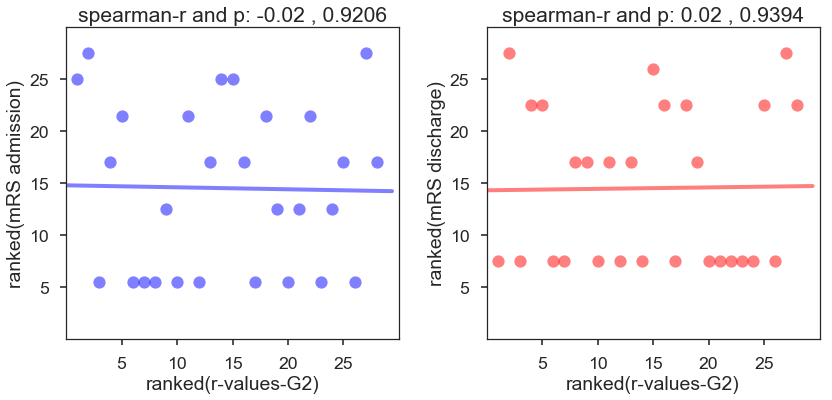

In [191]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r2),
            stats.rankdata(table.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G2)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r2,
            table.mRS_admission)) )

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r2),
            stats.rankdata(table.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G2)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r2,
            table.mRS_discharge)))

fig.tight_layout() 

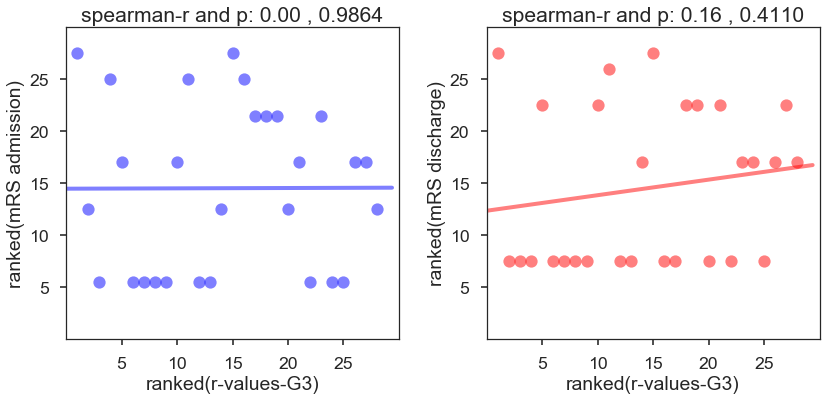

In [192]:
sns.set_context('poster', font_scale=1.1)
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(table.r3),
            stats.rankdata(table.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(r-values-G3)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r3,
            table.mRS_admission)))

ax2 = fig.add_subplot(122)
sns.regplot(stats.rankdata(table.r3),
            stats.rankdata(table.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(r-values-G3)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(table.r3,
            table.mRS_discharge)))

fig.tight_layout() 

## linear regression between distance and concordance

example subject

In [196]:
data_dir      = '/data/pt_mar006/subjects_masks/'
gradient_file = '/data/pt_mar006/subjects_group/mni3_component_1.nii.gz'

# get subject specific concordance and distance vectors
subject_id       = 'sd33'

concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

c, d = get_vectors(gradient_file,
                   concordance_file,
                   graymatter_file,
                   lesion_file)

slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)

print slope, intercept, r_value, p_value, std_err

6.037746397626145 0.25781874875240485 0.4270235571497293 0.0 0.07026099269729127


## linear regression analysis for distances-on-Gradient1 and concordances

In [201]:
gradient_file = '/data/pt_mar006/components/mni3_component_1.nii.gz'

rColumns = ['slope1', 'inter1']                

regres1 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres1.ix[subject_id]['slope1'] = "{:.6f}".format(slope)
    regres1.ix[subject_id]['inter1'] = "{:.6f}".format(intercept)
    

In [211]:
#regres1

## linear regression analysis for distances-on-Gradient2 and concordances

In [204]:
gradient_file = '/data/pt_mar006/components/mni3_component_2.nii.gz'

rColumns = ['slope2', 'inter2']                

regres2 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres2.ix[subject_id]['slope2'] = "{:.6f}".format(slope)
    regres2.ix[subject_id]['inter2'] = "{:.6f}".format(intercept)
    

In [212]:
#regres2

## linear regression analysis for distances-on-Gradient3 and concordances

In [207]:
gradient_file = '/data/pt_mar006/components/mni3_component_3.nii.gz'

rColumns = ['slope3', 'inter3']                

regres3 = pd.DataFrame(index=subject_list, 
                       columns=rColumns)

for subject_id in subject_list:
    
    concordance_file = os.path.join(data_dir, subject_id, 'conc_ccc.nii.gz')
    graymatter_file  = os.path.join(data_dir, subject_id, 'gm_mask_no_lesion.nii.gz')
    lesion_file      = os.path.join(data_dir, subject_id, 'lesion_mask_mni_gm.nii.gz')

    c, d = get_vectors(gradient_file,
                       concordance_file,
                       graymatter_file,
                       lesion_file)

    slope, intercept, r_value, p_value, std_err = stats.linregress(c, d)
    
    regres3.ix[subject_id]['slope3'] = "{:.6f}".format(slope)
    regres3.ix[subject_id]['inter3'] = "{:.6f}".format(intercept)
    

In [215]:
#regres3

# data frame for all regression slopes and behavioral scores

In [218]:
mytable = pd.concat([regres1,
                     regres2,
                     regres3,
                     db.ix[subject_list].NIHSS_admission,
                     db.ix[subject_list].NIHSS_discharge,
                     db.ix[subject_list].mRS_admission,
                     db.ix[subject_list].mRS_discharge,], axis =1)


In [219]:
mytable

,slope1,inter1,slope2,inter2,slope3,inter3,NIHSS_admission,NIHSS_discharge,mRS_admission,mRS_discharge
study_id,,,,,,,,,,
sd02,3.066821,1.037477,-1.874991,1.550890,1.358942,0.161639,6,1,2,1
sd05,2.359534,1.462784,-0.186501,0.805996,1.313528,0.047187,5,3,2,2
sd08,-0.492567,1.068094,0.893843,0.451007,-0.234648,0.374821,1,0,1,0
sd10,0.139218,0.809060,1.245250,0.539176,0.191218,0.250604,0,0,0,0
sd13,1.261649,1.500357,-0.648687,1.450764,1.285705,0.272401,7,0,4,0
sd14,3.158777,1.183747,-1.082548,1.349365,0.575865,0.233140,0,0,0,0
sd16,-3.226126,2.757450,2.842244,0.261686,0.286779,0.349893,1,0,0,0
sd17,0.551137,1.077258,2.755571,0.550106,0.436255,0.293248,3,2,2,2
sd21,1.713575,1.435987,1.321380,0.247306,1.041828,0.098878,1,0,3,2


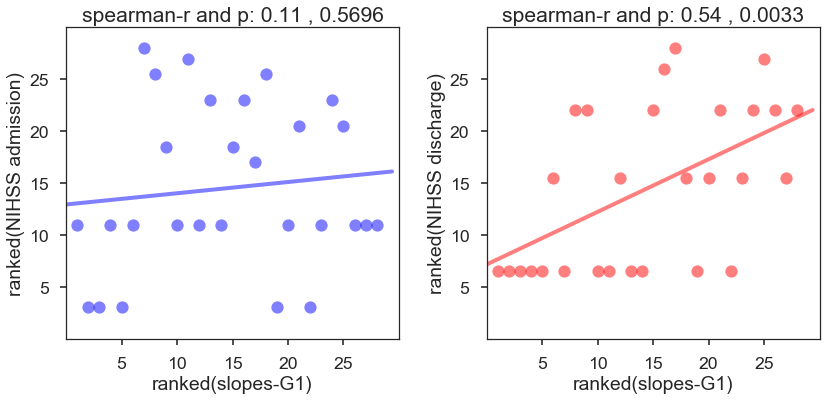

In [247]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope1),
            stats.rankdata(mytable.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G1)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope1,
            mytable.NIHSS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope1),
            stats.rankdata(mytable.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G1)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope1,
            mytable.NIHSS_discharge)))

fig.tight_layout() 

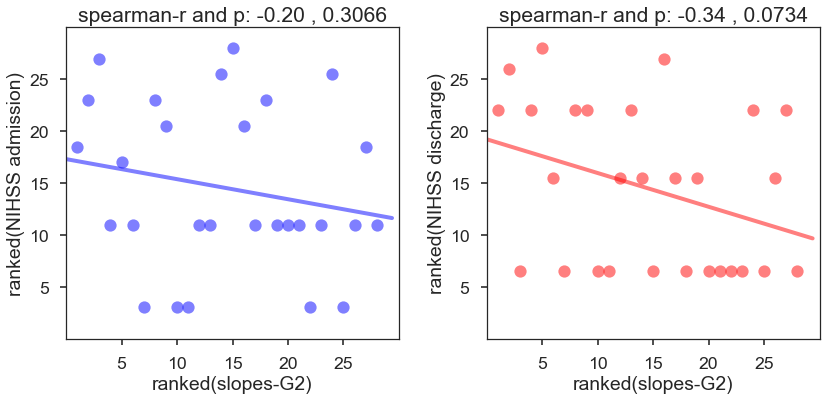

In [248]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope2),
            stats.rankdata(mytable.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G2)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope2,
            mytable.NIHSS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope2),
            stats.rankdata(mytable.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G2)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope2,
            mytable.NIHSS_discharge)))

fig.tight_layout() 

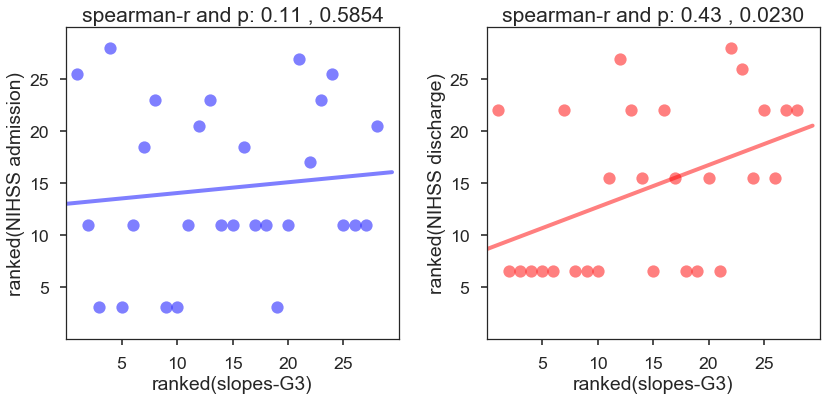

In [249]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope3),
            stats.rankdata(mytable.NIHSS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G3)')
plt.ylabel('ranked(NIHSS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope3,
            mytable.NIHSS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope3),
            stats.rankdata(mytable.NIHSS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G3)')
plt.ylabel('ranked(NIHSS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope3,
            mytable.NIHSS_discharge)))

fig.tight_layout() 

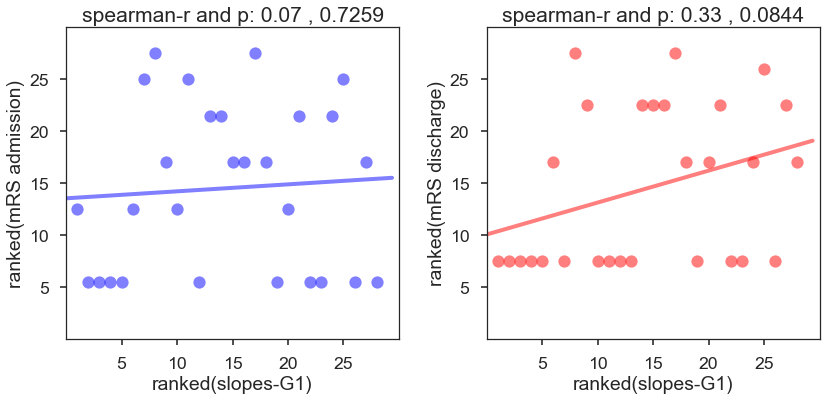

In [250]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope1),
            stats.rankdata(mytable.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G1)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope1,
            mytable.mRS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope1),
            stats.rankdata(mytable.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G1)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope1,
            mytable.mRS_discharge)))

fig.tight_layout() 

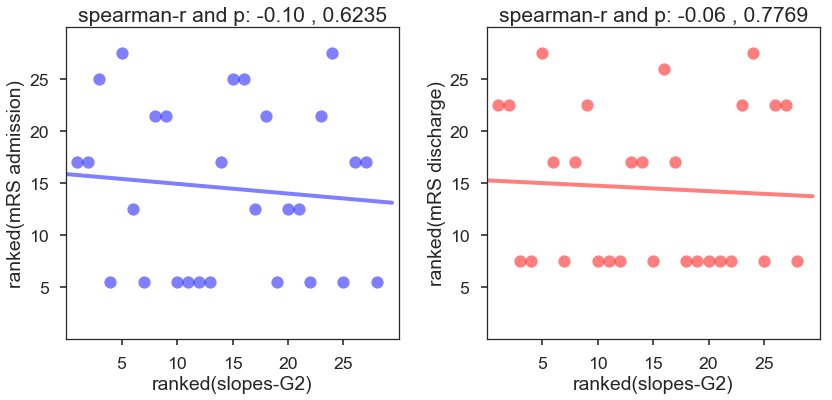

In [251]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope2),
            stats.rankdata(mytable.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G2)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope2,
            mytable.mRS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope2),
            stats.rankdata(mytable.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G2)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope2,
            mytable.mRS_discharge)))

fig.tight_layout() 

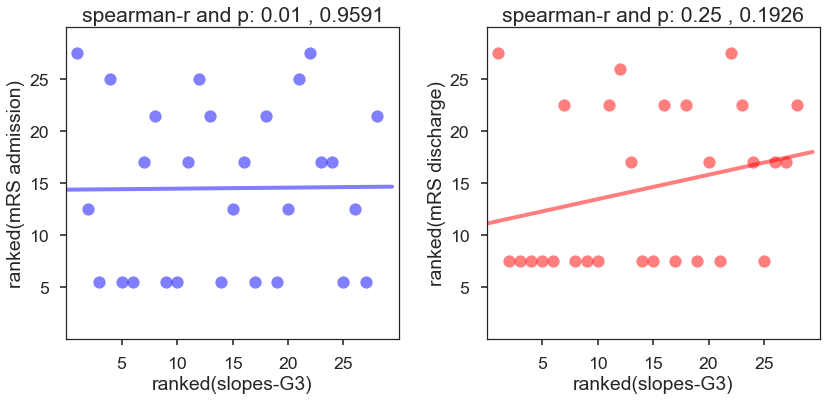

In [252]:
#sns.set_context('poster', font_scale=1.1)
#sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

sns.regplot(stats.rankdata(mytable.slope3),
            stats.rankdata(mytable.mRS_admission),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="b",
            ax = ax1)

plt.xlabel('ranked(slopes-G3)')
plt.ylabel('ranked(mRS admission)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope3,
            mytable.mRS_admission)))

ax2 = fig.add_subplot(122)

sns.regplot(stats.rankdata(mytable.slope3),
            stats.rankdata(mytable.mRS_discharge),
            ci=None,
            scatter_kws={"s": 150,"alpha":.5},
            line_kws={"lw":4,"alpha":0.5},
            color="r",
            ax = ax2)

plt.xlabel('ranked(slopes-G3)')
plt.ylabel('ranked(mRS discharge)')
plt.xticks([5, 10, 15, 20, 25])
plt.yticks([5, 10, 15, 20, 25])
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('spearman-r and p: %1.2f , %1.4f' 
          %(stats.spearmanr(mytable.slope3,
            mytable.mRS_discharge)))

fig.tight_layout() 